## Loading and understanding the data

In [24]:

!pip install -q seaborn shap imbalanced-learn


**1.Mount google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**2.Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')


**3.Load the csv files**

In [ ]:

cross_sectional_path = '/content/drive/MyDrive/oasis_cross-sectional.csv'
longitudinal_path = '/content/drive/MyDrive/oasis_longitudinal.csv'

cross_df = pd.read_csv(cross_sectional_path)
longitudinal_df = pd.read_csv(longitudinal_path)


**4.Explore dataset by showcasing columns and rows**

In [ ]:
# Cross-Sectional Data
print("Cross-Sectional Data:")
print(cross_df.head())
print(cross_df.info())
print(cross_df.describe())

# Longitudinal Data
print("\nLongitudinal Data:")
print(longitudinal_df.head())
print(longitudinal_df.info())
print(longitudinal_df.describe())


Cross-Sectional Data:
              ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
0  OAS1_0001_MR1   F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306   
1  OAS1_0002_MR1   F    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531   
2  OAS1_0003_MR1   F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207   
3  OAS1_0004_MR1   M    R   28   NaN  NaN   NaN  NaN  1588  0.803  1.105   
4  OAS1_0005_MR1   M    R   18   NaN  NaN   NaN  NaN  1737  0.848  1.010   

   Delay  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      436 non-null    object 
 1   M/F     436 non-null    object 
 2   Hand    436 non-null    object 
 3   Age     436 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 

### **Data Preprocessing**

**1. Concatenate two datasets with each other**

In [ ]:

full_df = pd.concat([cross_df, longitudinal_df], axis=0, ignore_index=True)

print("Combined Data Shape:", full_df.shape)


Combined Data Shape: (809, 18)


**2.Handle missing values**

In [ ]:

print(full_df.isnull().sum())

# Impute numerical features with mean
num_features = ['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV','ASF','Delay']
num_imputer = SimpleImputer(strategy='mean')
full_df[num_features] = num_imputer.fit_transform(full_df[num_features])

# Impute categorical features with mode
cat_features = ['M/F', 'Hand']
cat_imputer = SimpleImputer(strategy='most_frequent')
full_df[cat_features] = cat_imputer.fit_transform(full_df[cat_features])


ID            373
M/F             0
Hand            0
Age             0
Educ          574
SES           239
MMSE          203
CDR           201
eTIV            0
nWBV            0
ASF             0
Delay         789
Subject ID    436
MRI ID        436
Group         436
Visit         436
MR Delay      436
EDUC          436
dtype: int64


**3.Encode Categorical Variables**

In [ ]:
# Label Encoding for binary categorical variables
label_encoder = LabelEncoder()
full_df['M/F'] = label_encoder.fit_transform(full_df['M/F'])  # Male=1, Female=0
full_df['Hand'] = label_encoder.fit_transform(full_df['Hand'])      # Right=1, Left=0


**4.Create Target Variable**

In [ ]:

full_df['Dementia'] = full_df['Group'].apply(lambda x: 1 if x == 'Converted' else 0)


**5.Drop irrevalent columns**

In [ ]:

drop_columns = ['ID', 'SES', 'Delay', 'MR Delay','Educ']
full_df.drop(columns=drop_columns, inplace=True)


In [ ]:

print("Columns after dropping:")
print(full_df.columns.tolist())


Columns after dropping:
['M/F', 'Hand', 'Age', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF', 'Subject ID', 'MRI ID', 'Group', 'Visit', 'EDUC', 'Dementia']


**6.Feature Scaling**

In [ ]:
scaler = StandardScaler()
scaled_features = ['Age', 'EDUC', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

full_df[scaled_features] = scaler.fit_transform(full_df[scaled_features])


**7.Handle class imbalance**

In [ ]:
X = full_df.drop(columns=['Dementia'])
y = full_df['Dementia']


In [ ]:
# Display the data types of all columns in X
print("Data Types in X:")
print(X.dtypes)


Data Types in X:
M/F             int64
Hand            int64
Age           float64
MMSE          float64
CDR           float64
eTIV          float64
nWBV          float64
ASF           float64
Subject ID     object
MRI ID         object
Group          object
Visit         float64
EDUC          float64
dtype: object


In [ ]:

non_numeric_columns = X.select_dtypes(include=['object']).columns.tolist()
print("Non-Numerical Columns in X:", non_numeric_columns)


Non-Numerical Columns in X: ['Subject ID', 'MRI ID', 'Group']


In [ ]:
# Drop non-numerical columns from X
X = X.drop(columns=non_numeric_columns, inplace=False)

# Verify that the columns have been removed
print("Columns in X after dropping non-numerical columns:")
print(X.columns.tolist())


Columns in X after dropping non-numerical columns:
['M/F', 'Hand', 'Age', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF', 'Visit', 'EDUC']


In [ ]:
# Check for any remaining non-numerical columns
remaining_non_numeric = X.select_dtypes(include=['object']).columns.tolist()
print("Remaining Non-Numerical Columns in X:", remaining_non_numeric)


Remaining Non-Numerical Columns in X: []


In [ ]:
# Check for missing values in each column of X
missing_values = X.isnull().sum()
print("Missing values in each column of X:")
print(missing_values[missing_values > 0])


Missing values in each column of X:
Visit    436
dtype: int64


In [ ]:
# List all column names in X
print("Columns in feature set X:")
print(X.columns.tolist())


Columns in feature set X:
['M/F', 'Hand', 'Age', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF', 'Visit', 'EDUC']


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming X and y contain your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
best_rf = RandomForestClassifier(random_state=42)
best_rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

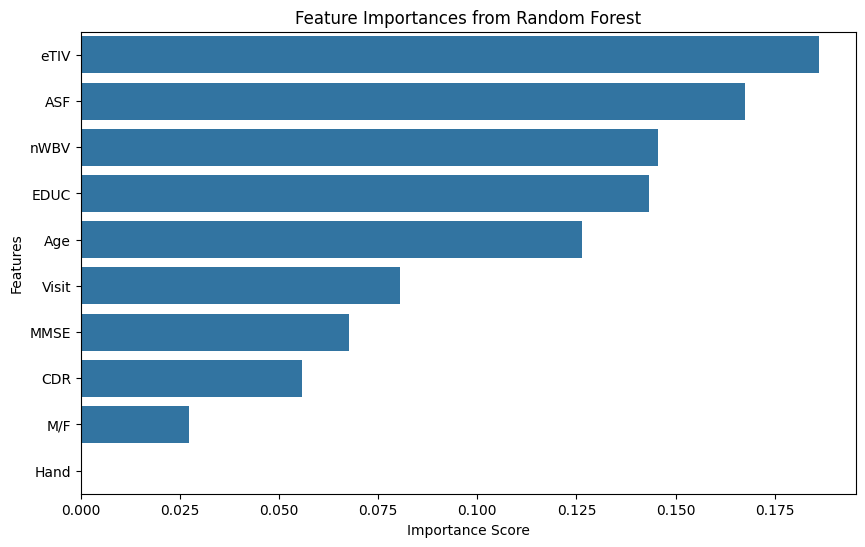

In [ ]:
# Assuming 'best_rf' is the trained Random Forest model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns)

# Sort feature importances in descending order
feature_importances = feature_importances.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [25]:
# Re-check for missing values
missing_values = X.isnull().sum()
print("Missing values in each column of X after handling 'Visit':")
print(missing_values[missing_values > 0])


Missing values in each column of X after handling 'Visit':
Visit    436
dtype: int64


In [26]:
from sklearn.impute import SimpleImputer

# Apply imputation
imputer = SimpleImputer(strategy='mean')  # Or strategy='median'
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)  # Ensure X is updated in place


In [27]:
# Check for any remaining NaNs in X
print("Number of NaN values in each column after imputation:")
print(X.isna().sum())


Number of NaN values in each column after imputation:
M/F      0
Hand     0
Age      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
Visit    0
EDUC     0
dtype: int64


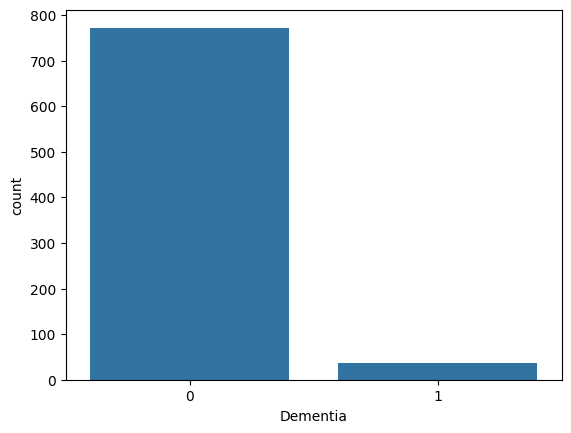

Dementia
0    772
1     37
Name: count, dtype: int64
After SMOTE:
Dementia
0    772
1    772
Name: count, dtype: int64


In [28]:
# Check class distribution
sns.countplot(x='Dementia', data=full_df)
plt.show()

print(full_df['Dementia'].value_counts())
from imblearn.over_sampling import SMOTE

# Initialize SMOTE with a random state for reproducibility
smote = SMOTE(random_state=42)

# Apply SMOTE to resample the dataset
X_res, y_res = smote.fit_resample(X, y)

# Verify the new class distribution
print("After SMOTE:")
print(y_res.value_counts())


### **Exploratory Data Analysis**

**1.Distribution of Numerical Features (Histogram)**

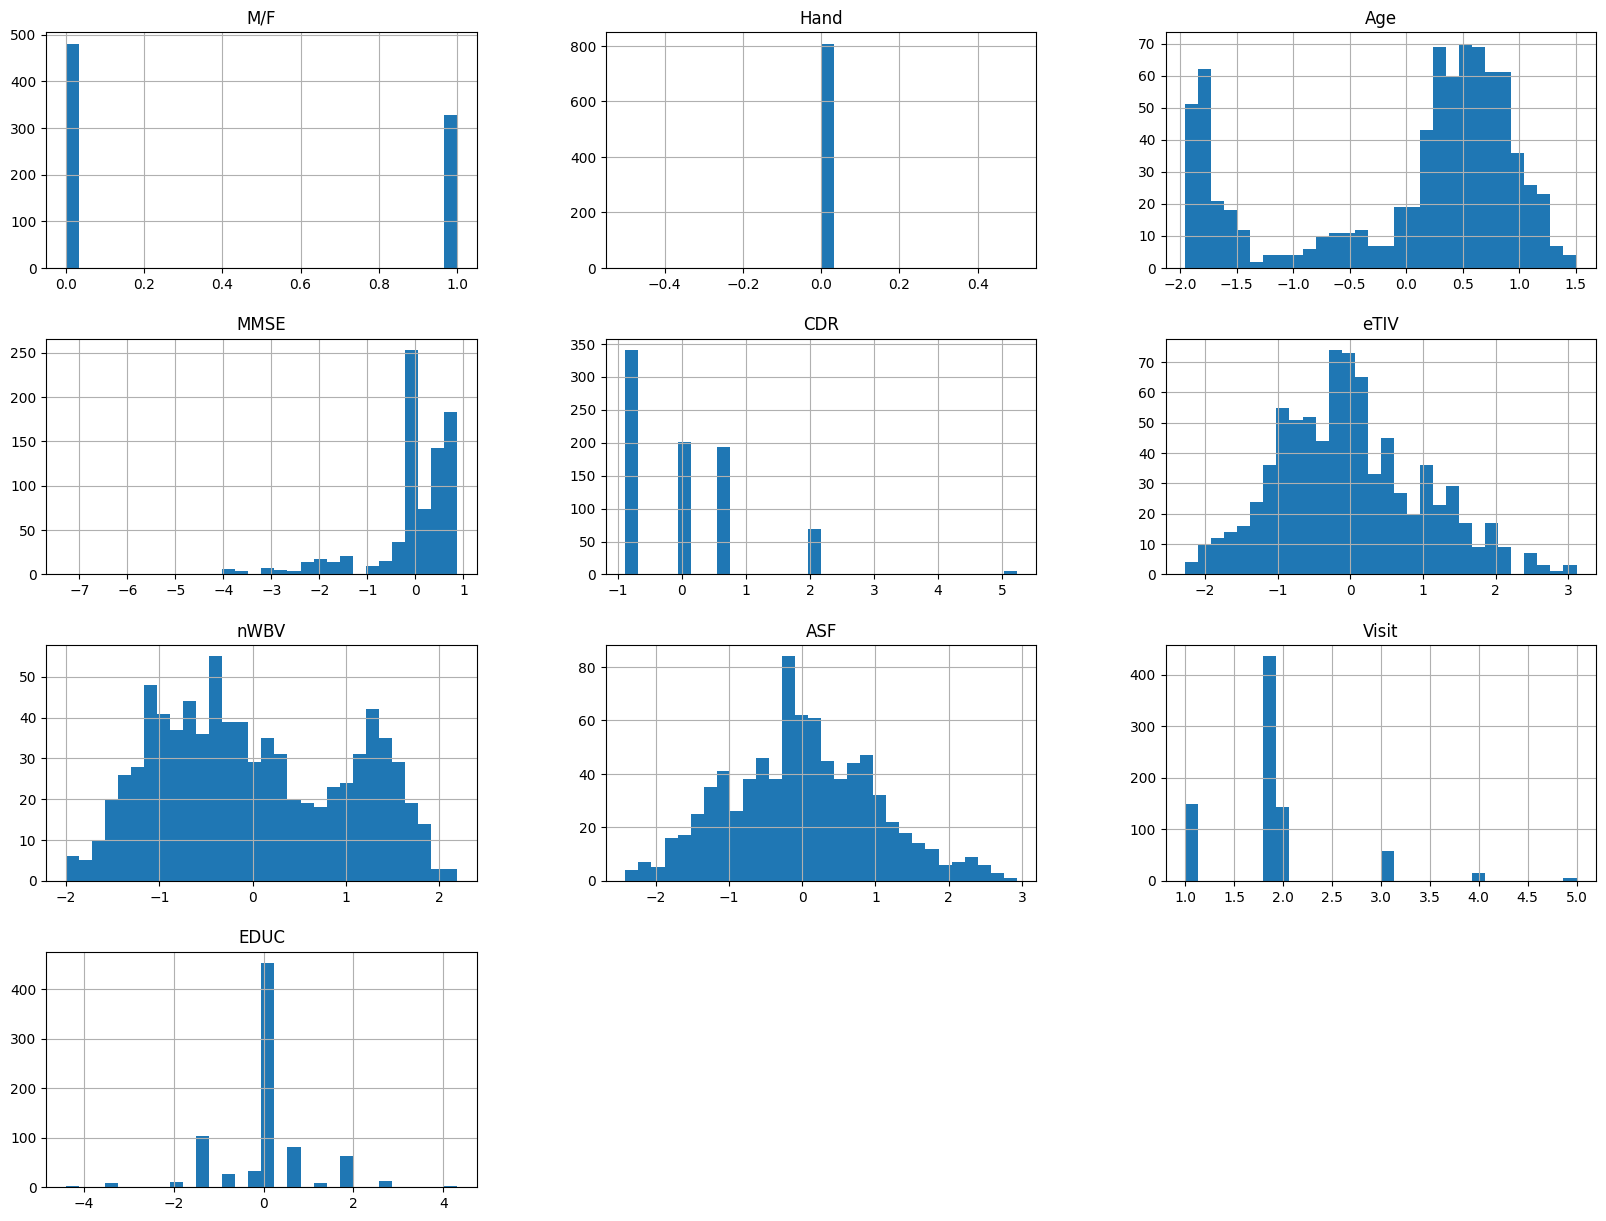

In [29]:

X.hist(bins=30, figsize=(20,15))
plt.show()


**2.Correlation Matrix**

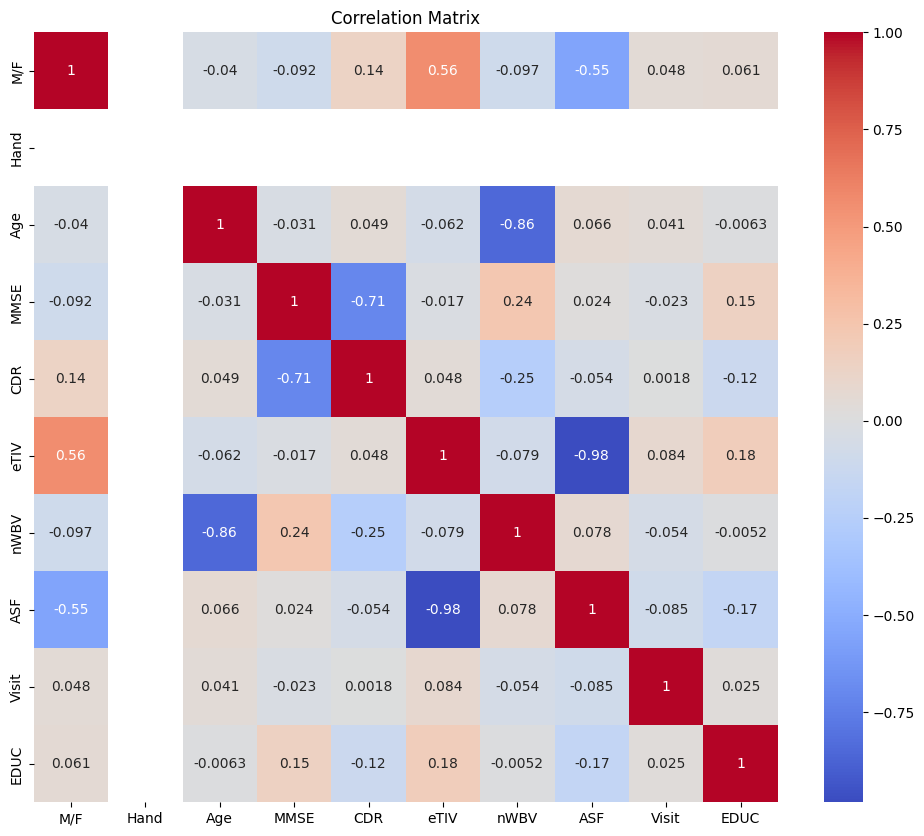

In [30]:
plt.figure(figsize=(12,10))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


**3.Boxplots to Identify Outliers**

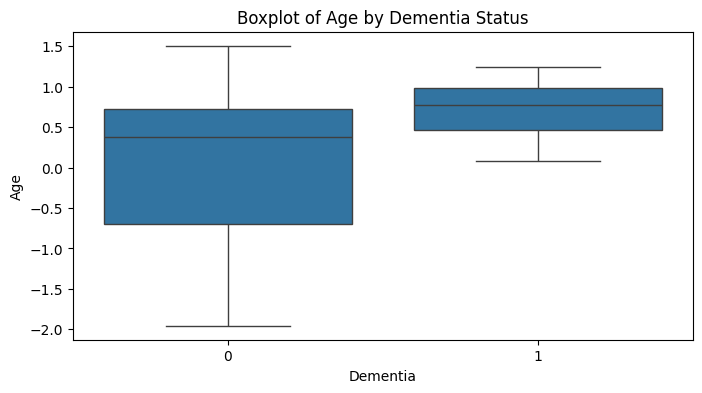

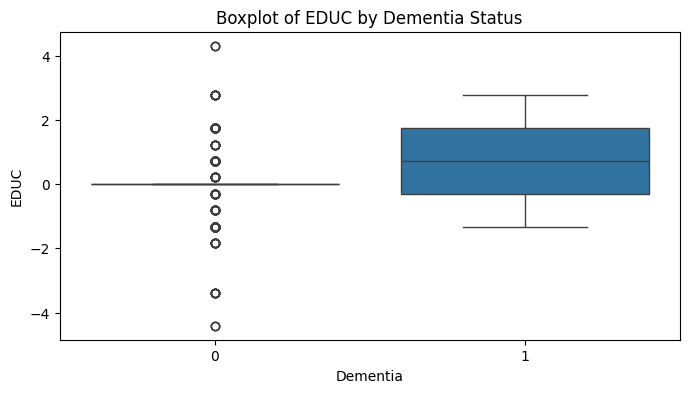

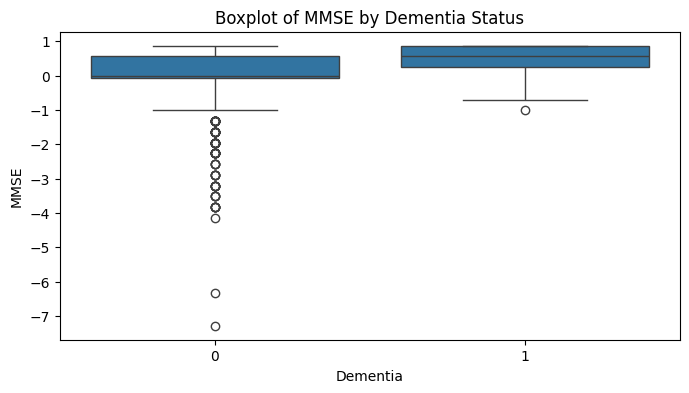

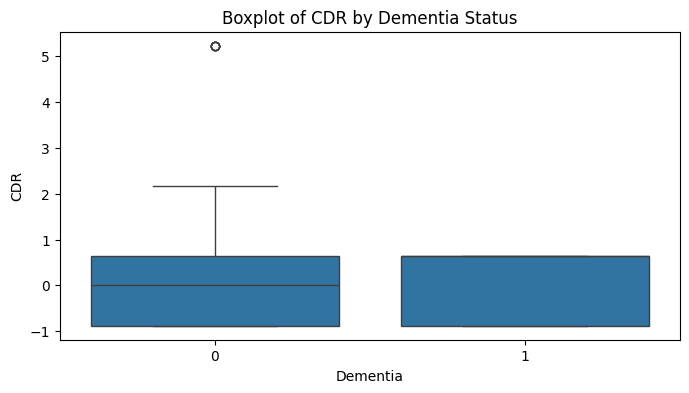

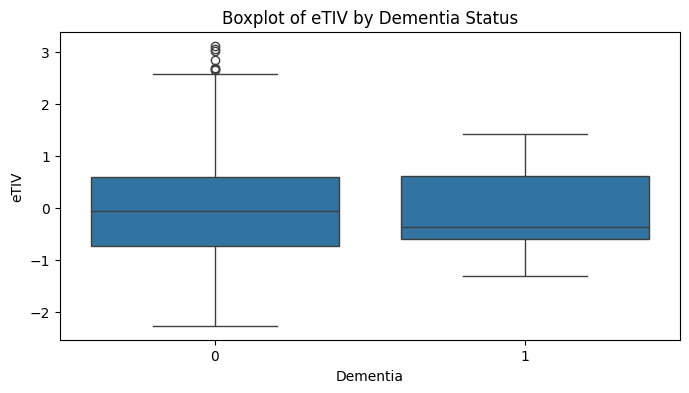

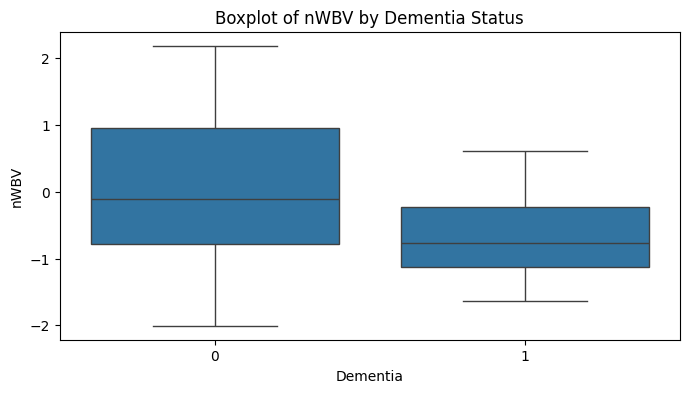

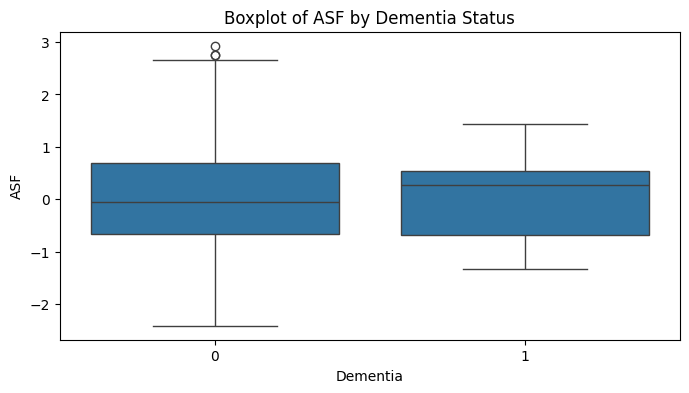

In [31]:
for feature in scaled_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=y, y=X[feature])
    plt.title(f'Boxplot of {feature} by Dementia Status')
    plt.show()


**4.Pair Plots**

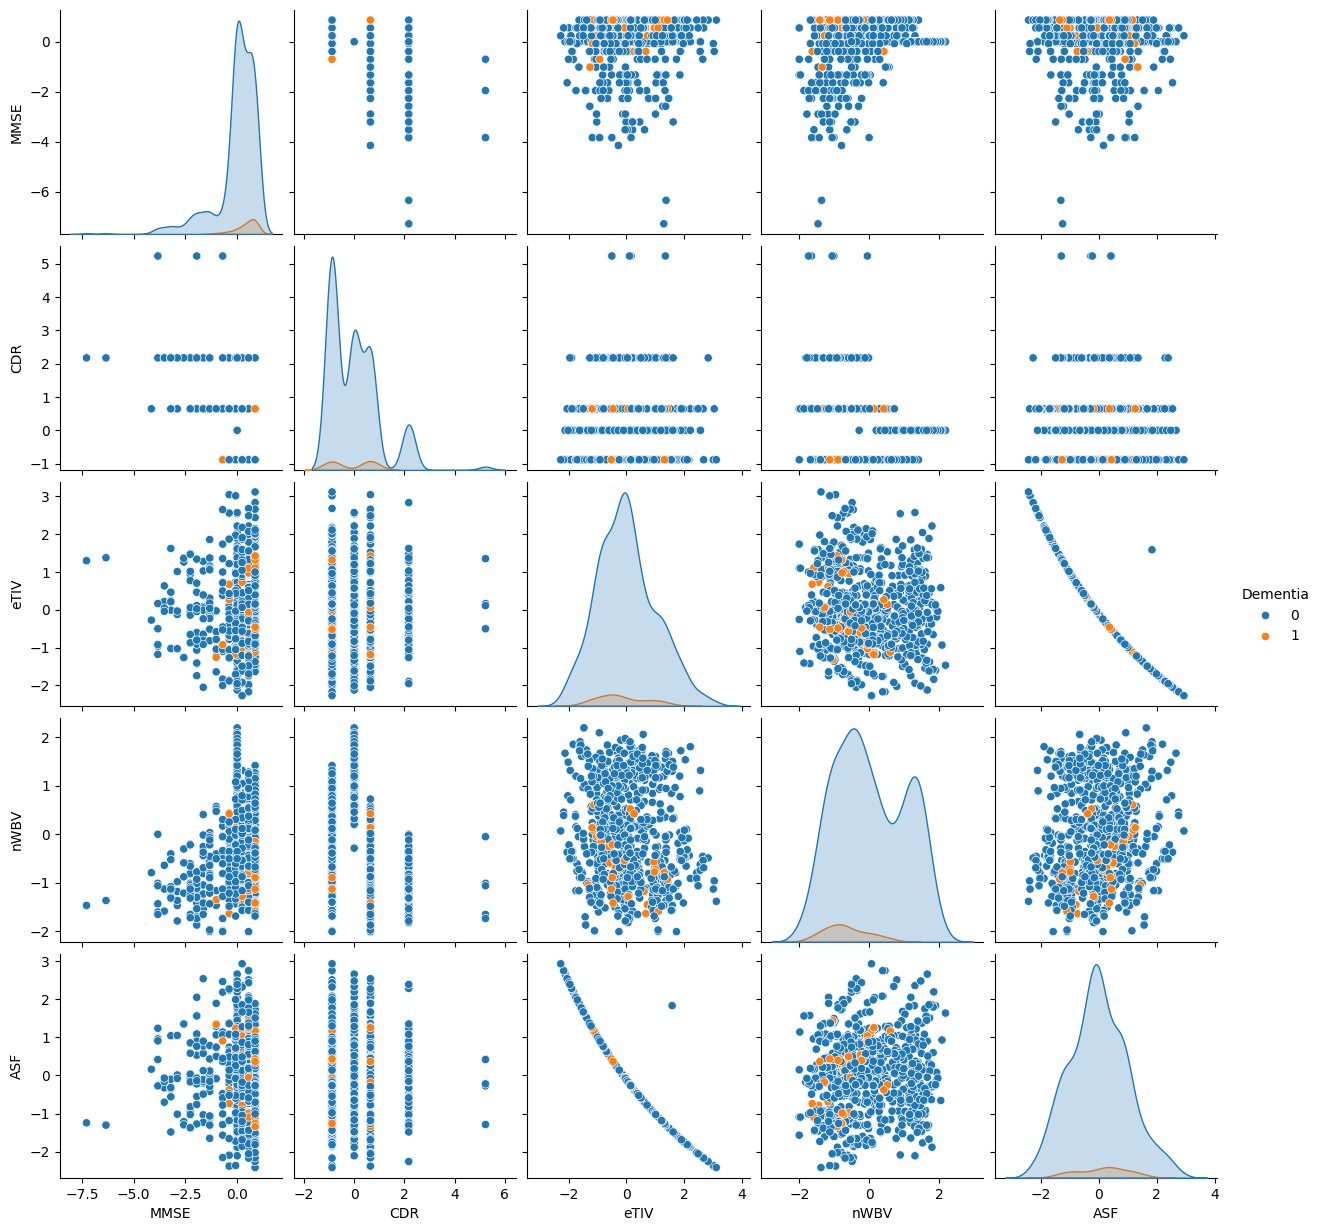

In [32]:
sns.pairplot(pd.concat([X, y], axis=1), hue='Dementia', vars=['MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'])
plt.show()


**5.Feature Importance from a Preliminary Model**

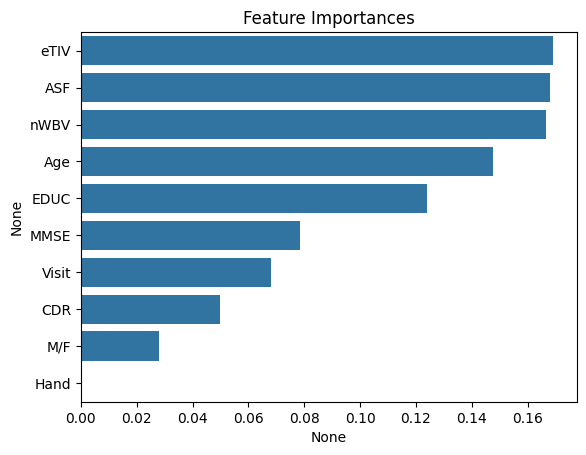

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances')
plt.show()


### **Feature Engineering**

**1.Interaction Features**

In [34]:

X['Age_MMSE'] = X['Age'] * X['MMSE']


**2.Polynomial Features**

In [35]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X[['Age', 'EDUC']])

poly_feature_names = poly.get_feature_names_out(['Age', 'EDUC'])
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

X = pd.concat([X, poly_df], axis=1)


**3.Dimensionality Reduction**

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
principal_components = pca.fit_transform(X)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
X = pd.concat([X, pca_df], axis=1)


**4.Feature Selection**

In [37]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)
selector.fit(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

X = X[selected_features]


Selected Features: Index(['Age', 'MMSE', 'nWBV', 'EDUC', 'Age_MMSE', 'Age', 'EDUC', 'Age EDUC',
       'PC1', 'PC3'],
      dtype='object')


### **Structured Data Models**

**1.Train_Test split**

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training Set:", X_train.shape)
print("Testing Set:", X_test.shape)


Training Set: (647, 14)
Testing Set: (162, 14)


**2.Define and Train Models**

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")


Logistic Regression trained.
Random Forest trained.
Gradient Boosting trained.
Support Vector Machine trained.
K-Nearest Neighbors trained.


**3.Evaluate Models**

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    print(f"\n{name} Evaluation:")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall: {rec:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}")



Logistic Regression Evaluation:
Accuracy: 0.96
Precision: 0.00
Recall: 0.00
F1-Score: 0.00
ROC-AUC: 0.70

Random Forest Evaluation:
Accuracy: 0.96
Precision: 0.50
Recall: 0.29
F1-Score: 0.36
ROC-AUC: 0.73

Gradient Boosting Evaluation:
Accuracy: 0.96
Precision: 0.67
Recall: 0.29
F1-Score: 0.40
ROC-AUC: 0.68

Support Vector Machine Evaluation:
Accuracy: 0.96
Precision: 0.00
Recall: 0.00
F1-Score: 0.00
ROC-AUC: 0.81

K-Nearest Neighbors Evaluation:
Accuracy: 0.91
Precision: 0.11
Recall: 0.14
F1-Score: 0.12
ROC-AUC: 0.75


**4.Hyperparameter Tuning (Example with Random Forest)**

In [41]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters for Random Forest:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_rf.predict(X_test)
y_proba_best = best_rf.predict_proba(X_test)[:,1]

acc = accuracy_score(y_test, y_pred_best)
prec = precision_score(y_test, y_pred_best)
rec = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
roc_auc = roc_auc_score(y_test, y_proba_best)

print(f"\nOptimized Random Forest Evaluation:")
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")


Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}

Optimized Random Forest Evaluation:
Accuracy: 0.96
Precision: 0.50
Recall: 0.29
F1-Score: 0.36
ROC-AUC: 0.79


### **Model Evaluation**

**1.Evaluating Random Forest**

Accuracy: 0.96
Precision: 0.50
Recall: 0.29
F1-Score: 0.36
ROC-AUC: 0.79


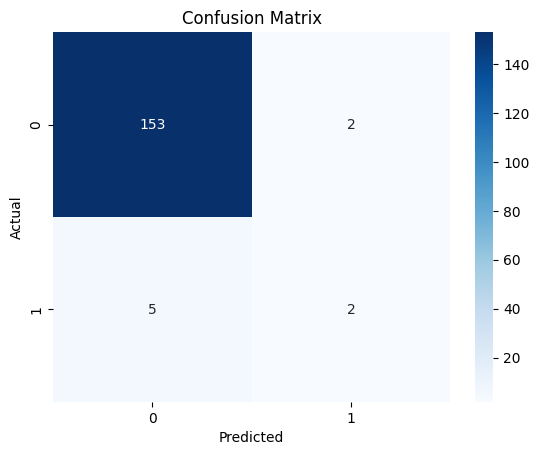

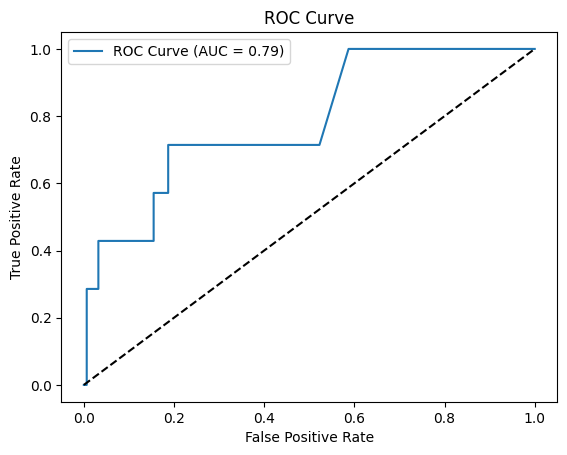

In [42]:
# Predictions
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:,1]

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


### **Model Interpretetion**

**1.Feature Importance (Tree-Based Models)**

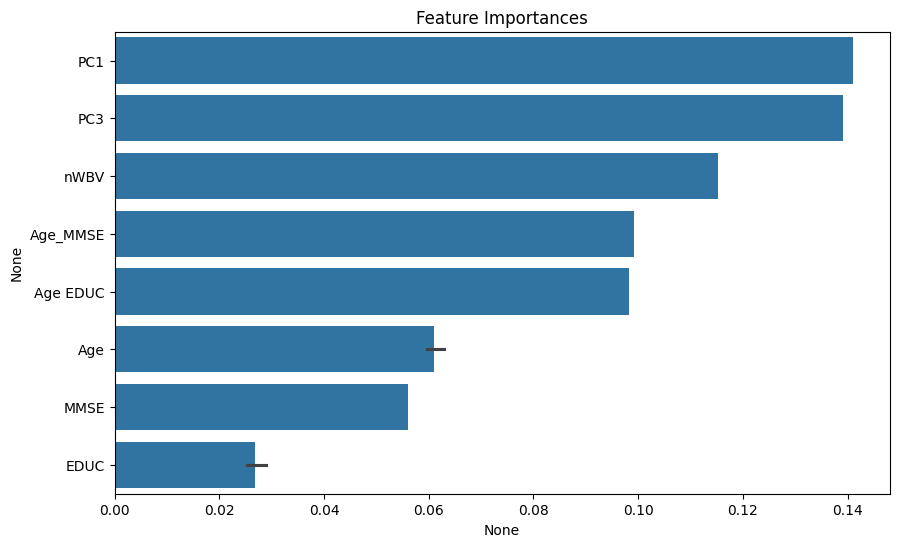

In [43]:
importances = best_rf.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances')
plt.show()


**2.SHAP (SHapley Additive exPlanations)**

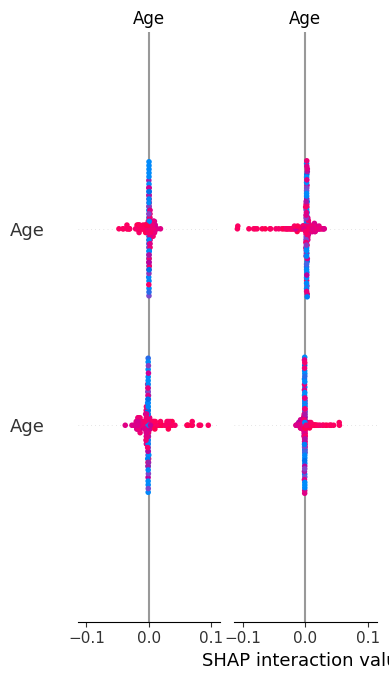

In [44]:
!pip install shap

import shap

# Initialize JS visualization
shap.initjs()

# Create SHAP explainer
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test)

# Summary Plot
shap.summary_plot(shap_values, X_test)


**3.LIME (Local Interpretable Model-agnostic Explanations)**

In [45]:
!pip install lime

import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['Nondemented', 'Demented'],
    mode='classification'
)

# Explain a single prediction
i = 0  # Index of the instance
exp = explainer.explain_instance(X_test.iloc[i], best_rf.predict_proba, num_features=5)
exp.show_in_notebook(show_table=True)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=d81faaa11fcefe1ed1f9e56d2d3e4c7bbfd2518197ac7448412beb48d660196a
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime
